
# <span style="background-color:yellow;">TASK 1: Introduction</span>

***


## **Dataset Descriptions**

### SYNTHETIC CIRCLES:

The **Synthetic Circle dataset** contains **10,000 points** arranged into **100 circular clusters**, each with 100 points.
Each data point has two numeric coordinates, `x` and `y`,and a **class label** that indicates which circle it belongs to.

* **Features:**

  * `x` → X-coordinate (continuous)
  * `y` → Y-coordinate (continuous)

* **Target:**

  * `class` → Integer label for the circle (0–99)

This dataset is mainly used to test how well **clustering algorithms** can identify circular or non-linear groupings.


**What “conflicting” means**

In this context, **“conflicting”** usually refers to **overlapping or hard-to-separate clusters**,
that is, when points from different circles lie close to each other or overlap in space.

Such conflicts make it **difficult for a clustering algorithm** to clearly distinguish which circle a point belongs to.



### BANK MARKETING:

The **Bank Marketing dataset** contains **45,211 records** from a Portuguese banking institution’s **direct marketing campaigns** conducted over phone calls.
The goal is to predict whether a client will **subscribe to a term deposit** (the target variable `y`).

Each record corresponds to one client and contains **demographic information**, **financial indicators**, and **campaign-related details**.

* **Features:**

  * `age` → Client’s age (integer)
  * `job` → Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
  * `marital` → Marital status (categorical: 'divorced','married','single','unknown')
  * `education` → Level of education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')	
  * `default` → Whether the client has credit in default (binary: yes/no)
  * `balance` → Average yearly balance in euros (integer)
  * `housing` → Has a housing loan? (binary: yes/no)
  * `loan` → Has a personal loan? (binary: yes/no)
  * `contact` → Communication type (categorical: cellular, telephone)
  * `day` → Last contact day of the month (integer 1–31)
  * `month` → Last contact month of the year (categorical: jan–dec)
  * `duration` → Duration of last contact in seconds (integer). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  * `campaign` → 	number of contacts performed during this campaign and for this client (numeric, includes last contact)
  * `pdays` → Days since last contact from a previous campaign (integer; -1 means *not previously contacted*)
  * `previous` → Number of contacts before this campaign (integer)
  * `poutcome` → Outcome of previous marketing campaign (categorical: 'failure','nonexistent','success', 'unknown', 'other')


* **Target:**

  * `y` → Whether the client subscribed to a term deposit (binary: yes/no)


This dataset combines **categorical and numerical features**, making it well-suited for testing **mixed-type preprocessing** and **unsupervised learning** methods such as clustering.
 
Categories with 'unknown' can be counted as null values. The features with this input include `job` , `marital`, `education` in demographic data and `poutcome`, `contact`, `pdays` as campaign related data. We should take note of this for handling missing values later. 

Also to note, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


**What “conflicting” means here**

In this context, **“conflicting”** refers to **clients with similar attributes but opposite outcomes**—for instance, two people with nearly identical profiles where one subscribed (`y = yes`) and the other did not (`y = no`).

Such conflicts highlight the **complexity and overlap** in behavioral and financial data, making it **challenging for clustering algorithms** to form clearly separated groups.

A key challenge was that the target variable (y) was highly imbalanced, containing: (shown later)

* “no” → 39922 records
* “yes” → 5289 records

## **Objective**
To apply and compare clustering algorithms on two real-world and synthetic datasets, explore the impact of dimensionality reduction on clustering performance, and develop skills in data preprocessing, visualization, and interpretation of results.

# <span style="background-color:#33cccc;">SYNTHETIC CIRCLES</span>



***

## <span style="background-color:yellow;">TASK 2: Exploratory Data Analysis (EDA)</span>

***



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df2: bank-full.csv is the correct one since its dimension matches with the assignment

In [55]:
circles = pd.read_csv('circles.csv')
bank = pd.read_csv('bank-full.csv', sep=';')

In [56]:
circles.head()

,x,y,class
0,3.15676,116.12252,6
1,16.14436,16.81660,11
2,100.31212,64.99025,53
3,-1.33773,84.81772,4
4,104.37328,62.42373,53


In [57]:
# Shape of dataset
print("\nShape of dataset:", circles.shape)

# Summary info
print("Dataset Info:")
circles.info()



Shape of dataset: (10000, 3)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   class   10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [58]:
print("\nMissing values count per column:")
print(circles.isnull().sum())


Missing values count per column:
x        0
y        0
class    0
dtype: int64


In [59]:
#Statistics of the dataset
circles.describe()

,x,y,class
count,10000.000000,10000.000000,10000.000000
mean,89.981670,90.003827,49.500000
std,57.457467,57.559719,28.867513
min,-5.000000,-4.999860,0.000000
25%,40.237885,40.133840,24.750000
50%,89.999995,90.000080,49.500000
75%,139.898800,139.977695,74.250000
max,184.999920,185.000000,99.000000


In [60]:
print("Column Data Types:\n")
print(circles.dtypes)
print("\nUnique classes:", circles['class'].nunique())
print("Classes range from", circles['class'].min(), "to", circles['class'].max())


Column Data Types:

x        float64
y        float64
class      int64
dtype: object

Unique classes: 100
Classes range from 0 to 99


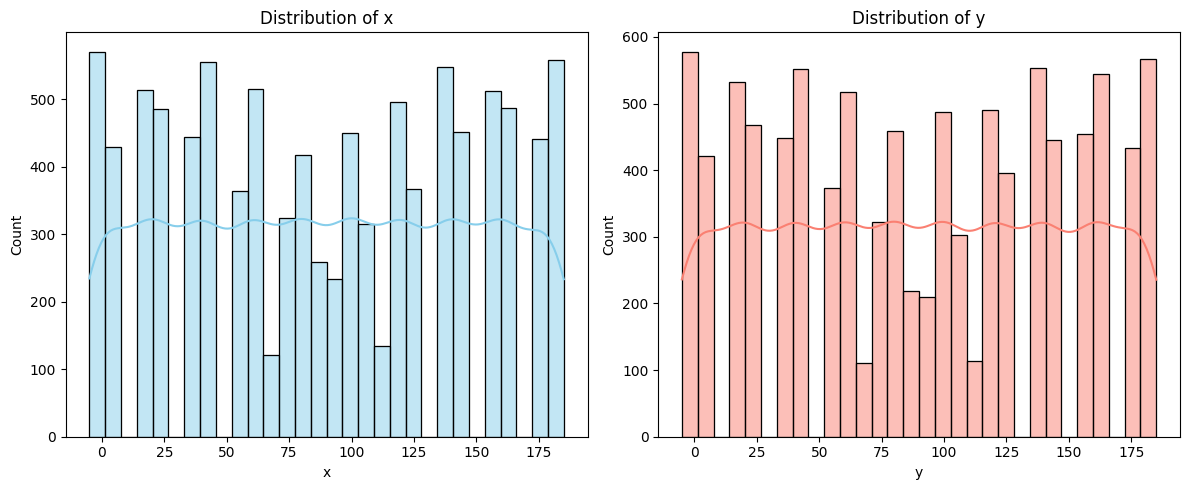

In [61]:
# Distribution of x and y
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(circles['x'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of x")

sns.histplot(circles['y'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of y")

plt.tight_layout()
plt.show()


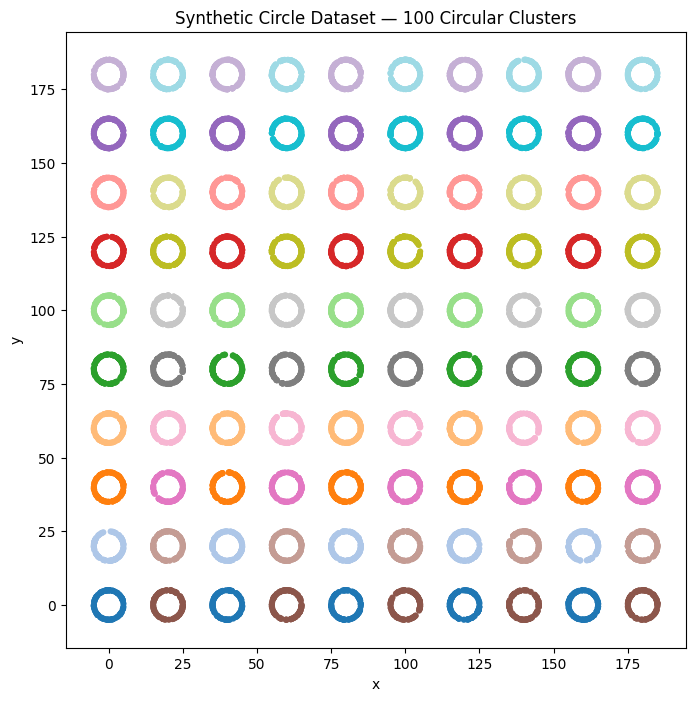

In [62]:
#Visualising Circles through scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=circles, x='x', y='y', hue='class', palette='tab20', s=20, linewidth=0)
plt.title("Synthetic Circle Dataset — 100 Circular Clusters")
plt.legend([],[], frameon=False)  # hide legend if too many classes
plt.show()


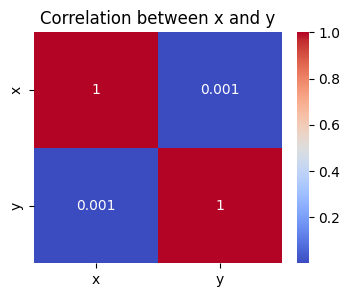

In [63]:
#Correlation Analysis
c_corr = circles[['x', 'y']].corr()

# Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(c_corr, annot=True, cmap='coolwarm')
plt.title("Correlation between x and y")
plt.show()


In [64]:
#Data Quality Analysis

# Duplicate rows
print("Number of duplicate rows:", circles.duplicated().sum())

# Check for any extreme values (potential outliers)
print("\nExtreme x values:", circles['x'].min(), "to", circles['x'].max())
print("Extreme y values:", circles['y'].min(), "to", circles['y'].max())


Number of duplicate rows: 0

Extreme x values: -5.0 to 184.99992
Extreme y values: -4.99986 to 185.0


### Observations made through EDA


* 10,000 samples, 2 continuous features (x, y), and 1 target variable (class)

* No missing or duplicate values

* 'x' and 'y' are evenly distributed across a wide range

* 100 balanced classes (each circle has 100 points)

* Correlation between x and y ≈ 0 (non-linear pattern)

* Visualization confirms 100 circular clusters, with slight overlaps (conflicts) between neighboring circles

* Dataset is clean and suitable for clustering experiments


]



***

## <span style="background-color:yellow;">TASK 3: Preprocessing</span>

***

In [65]:
import sklearn
print(sklearn.__version__)

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

1.5.2


* The dataset has no missing values, so imputation or removal is not needed

In [66]:
# One-hot encode the 'class' column (optional)
circles_encoded = pd.get_dummies(circles, columns=['class'])
circles_encoded.head()


,x,y,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,...,class_90,class_91,class_92,class_93,class_94,class_95,class_96,class_97,class_98,class_99
0,3.15676,116.12252,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,16.14436,16.81660,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,100.31212,64.99025,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.33773,84.81772,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,104.37328,62.42373,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale x and y
circles[['x', 'y']] = scaler.fit_transform(circles[['x', 'y']])

# Check scaled values
circles.head()


,x,y,class
0,-1.511192,0.453790,6
1,-1.285142,-1.271564,11
2,0.179802,-0.434589,53
3,-1.589419,-0.090104,4
4,0.250487,-0.479180,53


In [68]:
circles['distance_from_origin'] = np.sqrt(circles['x']**2 + circles['y']**2)


* Feature selection not needed since there are only 2 features
* Sampling / Undersampling is not needed since dataset is balanced across classes.

*** 

## <span style="background-color:yellow;">TASK 4: Clustering Methods</span>

***

In [69]:
#Scaling features

scaler = StandardScaler()
circles[['x', 'y']] = scaler.fit_transform(circles[['x', 'y']])



#### __Method 1: K-Means Clustering__
_Step 1a_: Choose Hyperparameters

* n_clusters = 100 → because the dataset has 100 circles

* init = 'k-means++' → good default initialization

* random_state = 42 → for reproducibility

In [70]:
kmeans = KMeans(n_clusters=100, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(circles[['x', 'y']])


_Step 1b_: Visualize Clusters

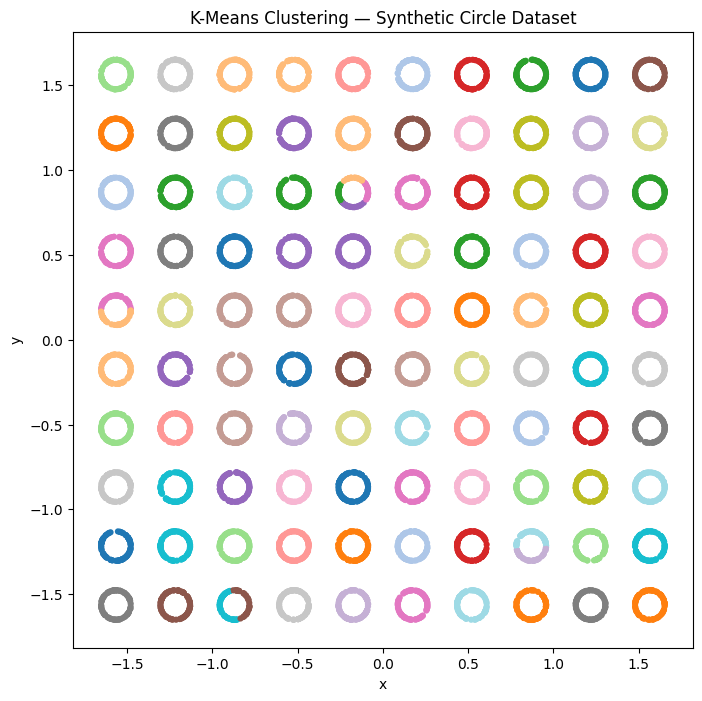

In [71]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=circles['x'], y=circles['y'], hue=kmeans_labels, palette='tab20', s=20, linewidth=0)
plt.title("K-Means Clustering — Synthetic Circle Dataset")
plt.legend([], [], frameon=False)  # Hide legend for clarity
plt.show()


_Step 1c_: Evaluate Clusters

In [72]:
sil_score = silhouette_score(circles[['x', 'y']], kmeans_labels)
db_score = davies_bouldin_score(circles[['x', 'y']], kmeans_labels)

print("K-Means Silhouette Score:", sil_score)
print("K-Means Davies-Bouldin Index:", db_score)


K-Means Silhouette Score: 0.5901229433934572
K-Means Davies-Bouldin Index: 0.5469307901035957


*** 

## <span style="background-color:yellow;">TASK 5: Dimensionality Reduction</span>

***

*** 

## <span style="background-color:yellow;">TASK 6: Clustering After Dimensionality Reduction</span>

***

*** 

## <span style="background-color:yellow;">TASK 7: Comparison and Discussion</span>

***

*** 

## <span style="background-color:yellow;">TASK 8: Conclusion</span>

***

# <span style="background-color:#33cccc;">BANK MARKETING</span>

***
## <span style="background-color:yellow;">TASK 2: Exploratory Data Analysis (EDA)</span>

Since we had already lodged our dataset in the "bank" variable for ease, let us proceed with it's EDA. 

In [73]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [74]:
print("Dataset Info:") 
bank.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [75]:
print("\nMissing values count per column:") 
print(bank.isnull().sum())

print("\n Count in our target variable:") 
print(bank['y'].value_counts())


Missing values count per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 Count in our target variable:
y
no     39922
yes     5289
Name: count, dtype: int64


Two things to note: 


a) Responses are heavily imbalanced (no >> yes)

b) There are no apparent missing values but as per the description of the dataset, `poutcome`, `contact`, `pdays` hold null values labeled as "unknown". Similarly for, `job` , `marital`, `education`. 

In [76]:
print("\n'unknown' label count per column:")
print((bank == 'unknown').sum())


'unknown' label count per column:
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [77]:
print((bank['pdays'] == -1).value_counts())

pdays
True     36954
False     8257
Name: count, dtype: int64


As we noticed, besides `marital`, the other 5 features have many empty or "unknown" values. Or for the case of `pdays`, more uncontacted records than contacted. This is something to note, to improve later for marketting. 

In [78]:
# ['default', 'housing', 'loan', 'y'] are the binary columns. 

for col in ['default', 'housing', 'loan', 'y']:
    bank[col] = bank[col].map({'yes': 1, 'no': 0}).astype('int64')
print(bank.head())


   age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0  


In [79]:
#Statistics of the dataset 
bank.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


One can observe the following:

* Average age is 40 year olds, who fall in middle age. 
* Youngest being 18 year old. 
* Most people do not have credit in default, which shows that they repay payments/loans on time. Worth exploring count for its category. 
* Most people have a housing loan, but not a personal loan. 
* Average day of last contact is 15th day. Which seems good enough from marketting perspective. 
* Average of 2 calls made for campaign calls. Max being 63?? 
* On average, there is a new campaign after 40 days; there is a mean of 40 days between the prev and the current campaign. 
* Average for previous is close to 0, which makes you think if it is a newly opened bank? Marketting for the same makes sense. 


In [80]:
print((bank['default']== 1).value_counts())

default
False    44396
True       815
Name: count, dtype: int64


815 people are unable to repay their debts on time. This is a crucial observation. 

In [81]:
bank.duplicated().sum()

0

In [82]:
print(bank.dtypes)

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object


In [83]:
cat_bank = []
for col in bank.select_dtypes(include=['object']).columns:
    cat_bank.append(col)

num_bank = []
for col in bank.select_dtypes(include=['int64']).columns:
    num_bank.append(col)

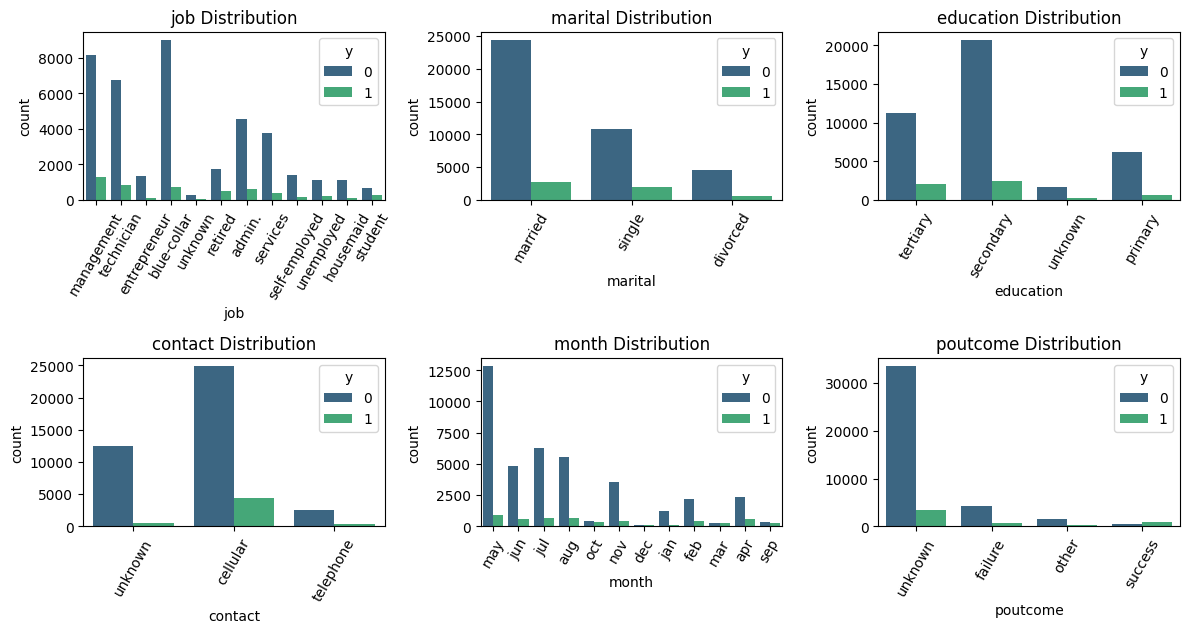

In [84]:
# Define subplot grid
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = axes.flatten()

# Plot each categorical column
for i, col_name in enumerate(cat_bank):
    sns.countplot(data=bank, x=bank[col_name], ax=axes[i], palette="viridis", hue='y')
    axes[i].set_title(f"{col_name} Distribution", fontsize=12)
    axes[i].tick_params(axis="x", rotation=60)

# Remove unused axes if cat_cols < rows*cols
for j in range(len(cat_bank), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Key observations, those who subscribe to a term deposit after the campaign:

* Management tend to subscribe to a term deposit, in comparison to other job descriptions. With technicians and blue collared people following up.
* Married people subscribe more than divorced.  
* Those with secondary and then tertiary education 
*  Cellular contact proves to be more efficient. 
* Those last contacted in May reaped best results but it also required a high count. In terms of effort and results, month of September, October, March show the most efficient results. But why is May's count so high? New policies introduced? New campaigns?  
* It is suprising how successful labelled campaigns also failed to have everyone subscribed to a term deposit. While those labelled as a failure still convinced some to subscribe. What does 'other' imply here?


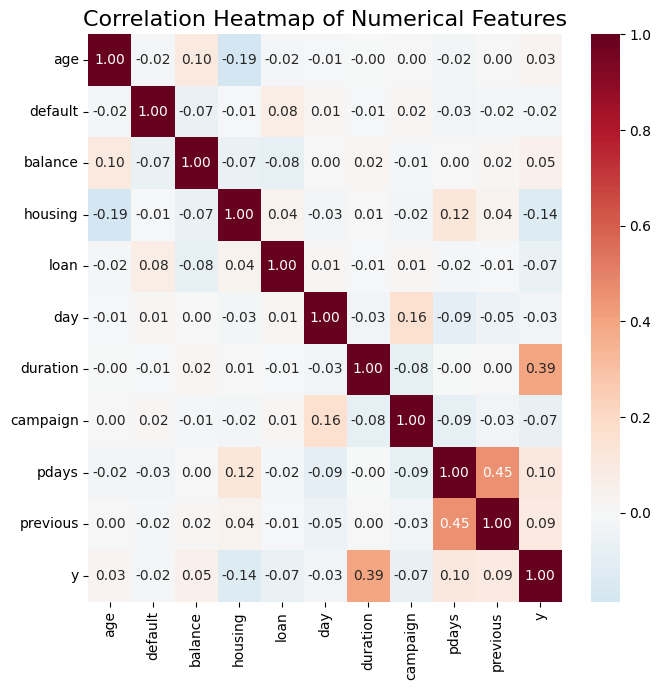

In [85]:
b_corr = bank[num_bank].corr()

# Plot heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(b_corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0, cbar=True)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

We notice stronger positive correlation between pdays and previous; balance and age; and lastly, day and campaign. 

Observing the correlation with our target variable, positive (duration, pdays, previous) and negative(housing, campaign, loan).

This implies how the duration of the last contact, number of prev contacts showed us positive relations, which is proportional to the effort put in marketting. 

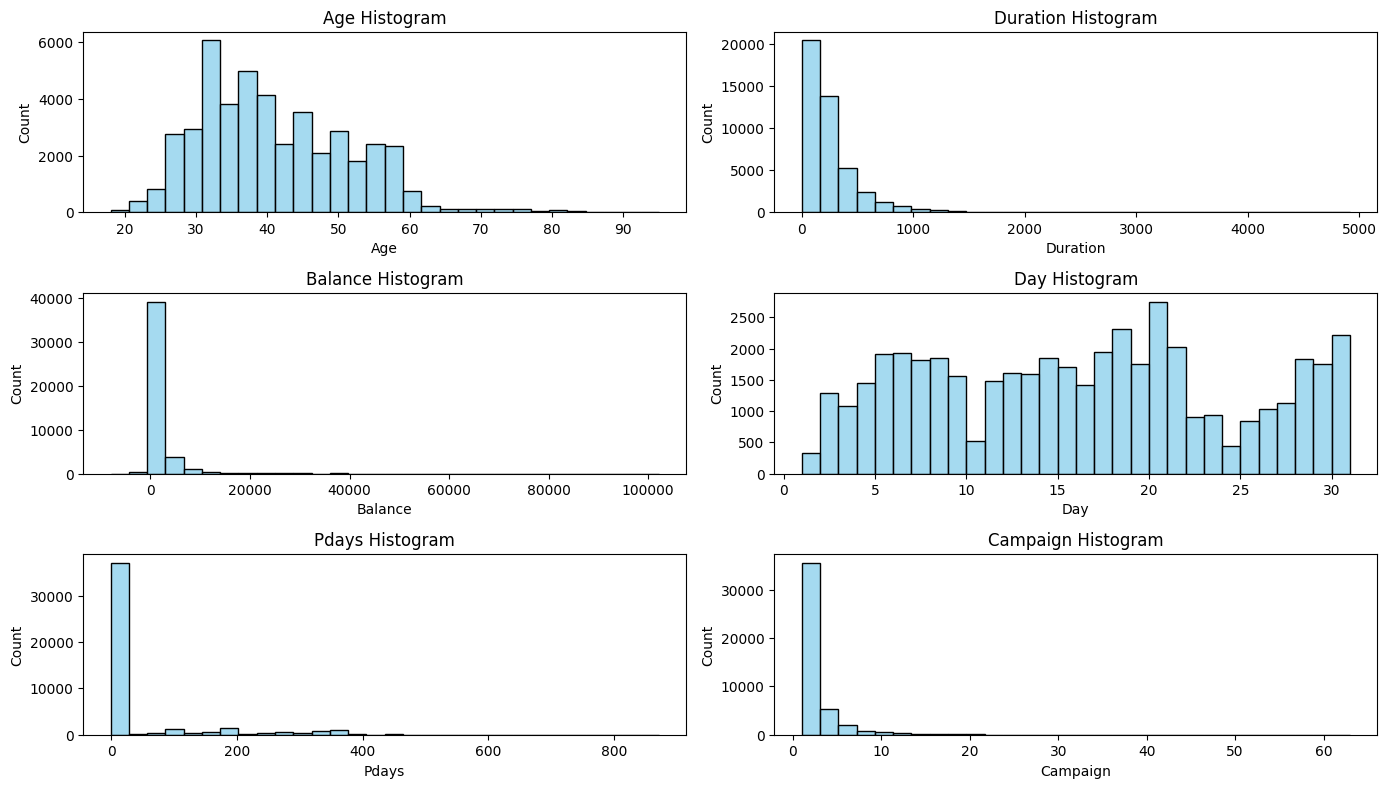

In [86]:
b_cols = ['age', 'duration', 'balance', 'day', 'pdays', 'campaign']

# Set up grid: 7 rows × 2 columns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 18))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(b_cols):
    sns.histplot(bank[col], bins=30, kde=False, color="skyblue", ax=axes[i])
    axes[i].set_title(f"{col.capitalize()} Histogram", fontsize=12)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")

# Remove unused subplots if there are any
for j in range(len(b_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In our dataset, 

* 30-40 age group are highest
* Call durations are less than 500 seconds in most cases 
* People with low balance have been the target before, which is appropriate as ideally, they would need loans. 
* Campaign calls range between 0-10. 

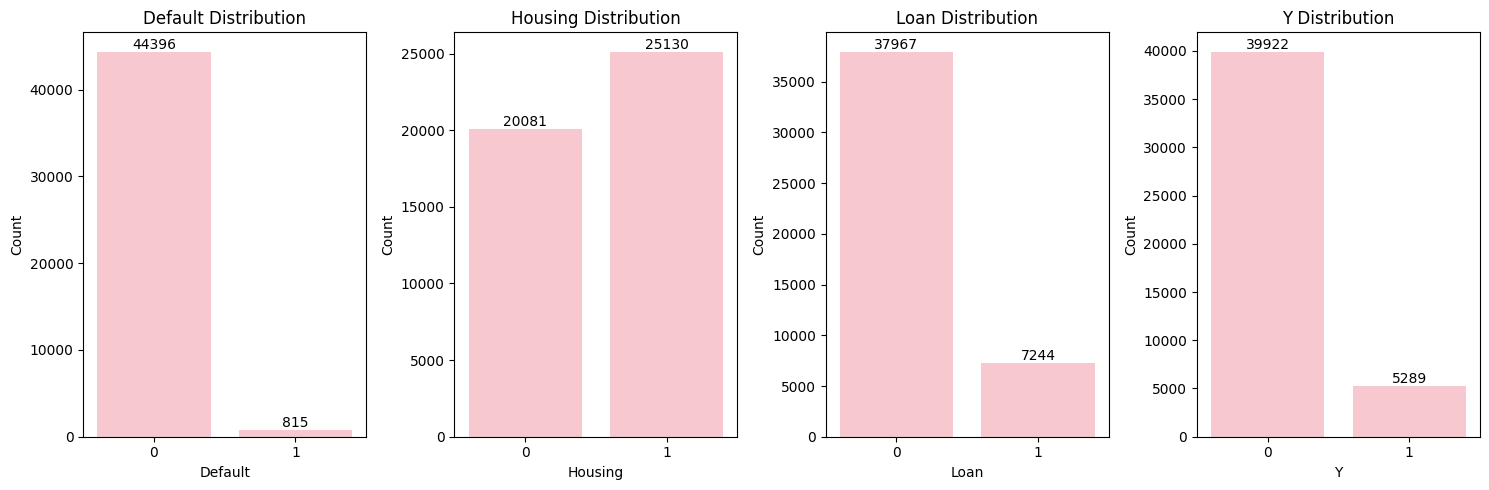

In [91]:

binary_cols = ['default', 'housing', 'loan', 'y']

# Set up subplots
fig, axes = plt.subplots(1, len(binary_cols), figsize=(15, 5))

# Plot count plots for each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(x=bank[col], ax=axes[i], color="pink")
    axes[i].set_title(f"{col.capitalize()} Distribution", fontsize=12)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")

    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{int(height)}', 
                         xy=(p.get_x() + p.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()


* Most people are punctual in repaying
* Slightly more than half records have a housing loan
* while lesser people have personal loans and even lesser take up the subscription. 

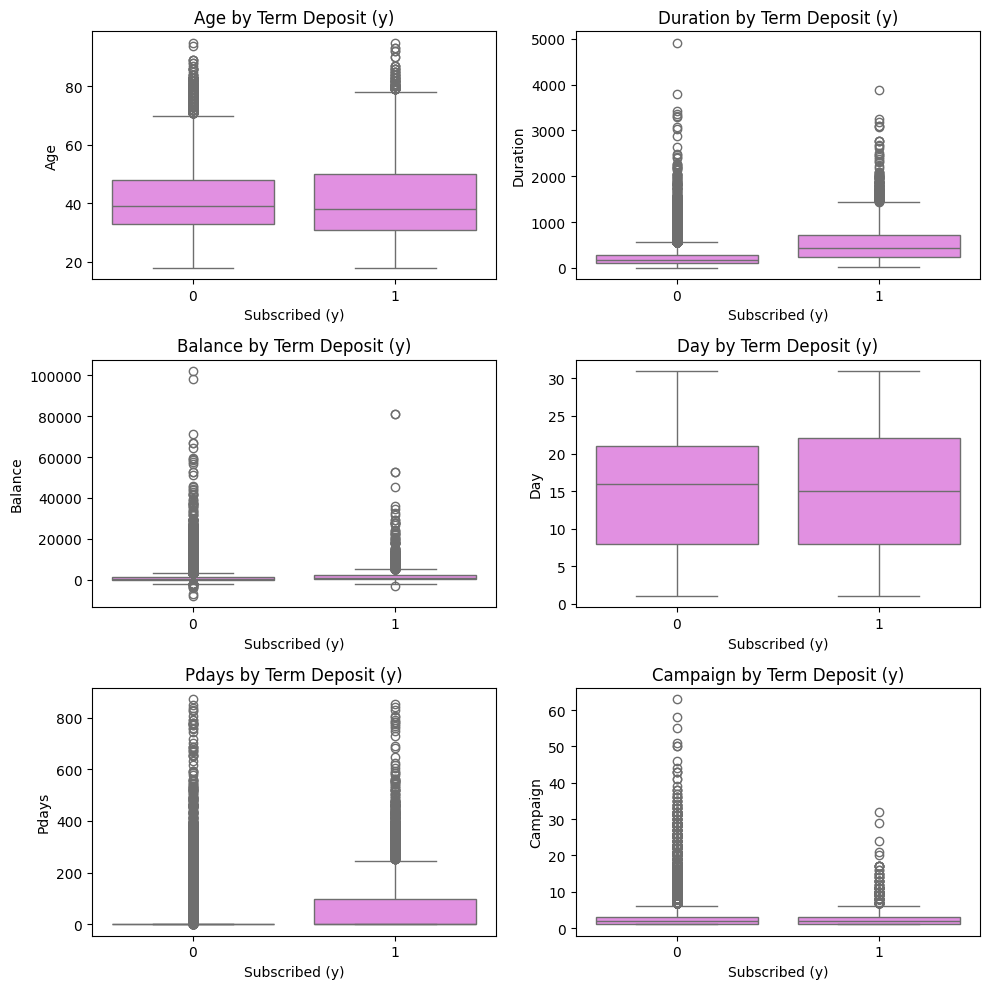

In [87]:

# List of numeric columns to plot
num1_bank = ['age', 'duration', 'balance', 'day', 'pdays', 'campaign']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(num1_bank):
    sns.boxplot(data=bank, x='y', y=col, ax=axes[i], color='violet')
    axes[i].set_title(f"{col.capitalize()} by Term Deposit (y)", fontsize=12)
    axes[i].set_xlabel("Subscribed (y)")
    axes[i].set_ylabel(col.capitalize())

# Remove unused subplots if any
for j in range(len(num1_bank), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Observations made, majorly getting an idea about the outliers, that end up taking the subscription:
* Age (80 and above)  
* Call duration longer than almost 1500 seconds
* If days of contact for the previous campaign is higher than 250 days 
* campaign contacts greater than 7 or 8 


***

## <span style="background-color:yellow;">TASK 3: Preprocessing</span>

***


For outlier handling, Z-Score Method was used:

* Identified and removed data points that fell beyond ±3 standard deviations from the mean.
* This method focuses on standard deviation as a measure of dispersion.

In [88]:
def count_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return ((col < lower) | (col > upper)).sum()

outliers_df = (
    bank[num_bank]
    .apply(count_outliers)
    .reset_index()
    .rename(columns={'index': 'Column', 0: 'Outliers_Count'})
    .sort_values(by="Outliers_Count", ascending=False)
    .reset_index(drop=True)
)
outliers_df

,Column,Outliers_Count
0,pdays,8257
1,previous,8257
2,loan,7244
3,y,5289
4,balance,4729
5,duration,3235
6,campaign,3064
7,default,815
8,age,487
9,housing,0


In [89]:
from scipy import stats
df_zscore = bank.copy()

z = np.abs(stats.zscore(df_zscore[num_bank], nan_policy='omit'))
df_zscore = df_zscore[(z < 3).all(axis=1)]

print("Shape before:", bank.shape)
print("Shape after cleaning (Z-score):", df_zscore.shape)

Shape before: (45211, 17)
Shape after cleaning (Z-score): (39456, 17)


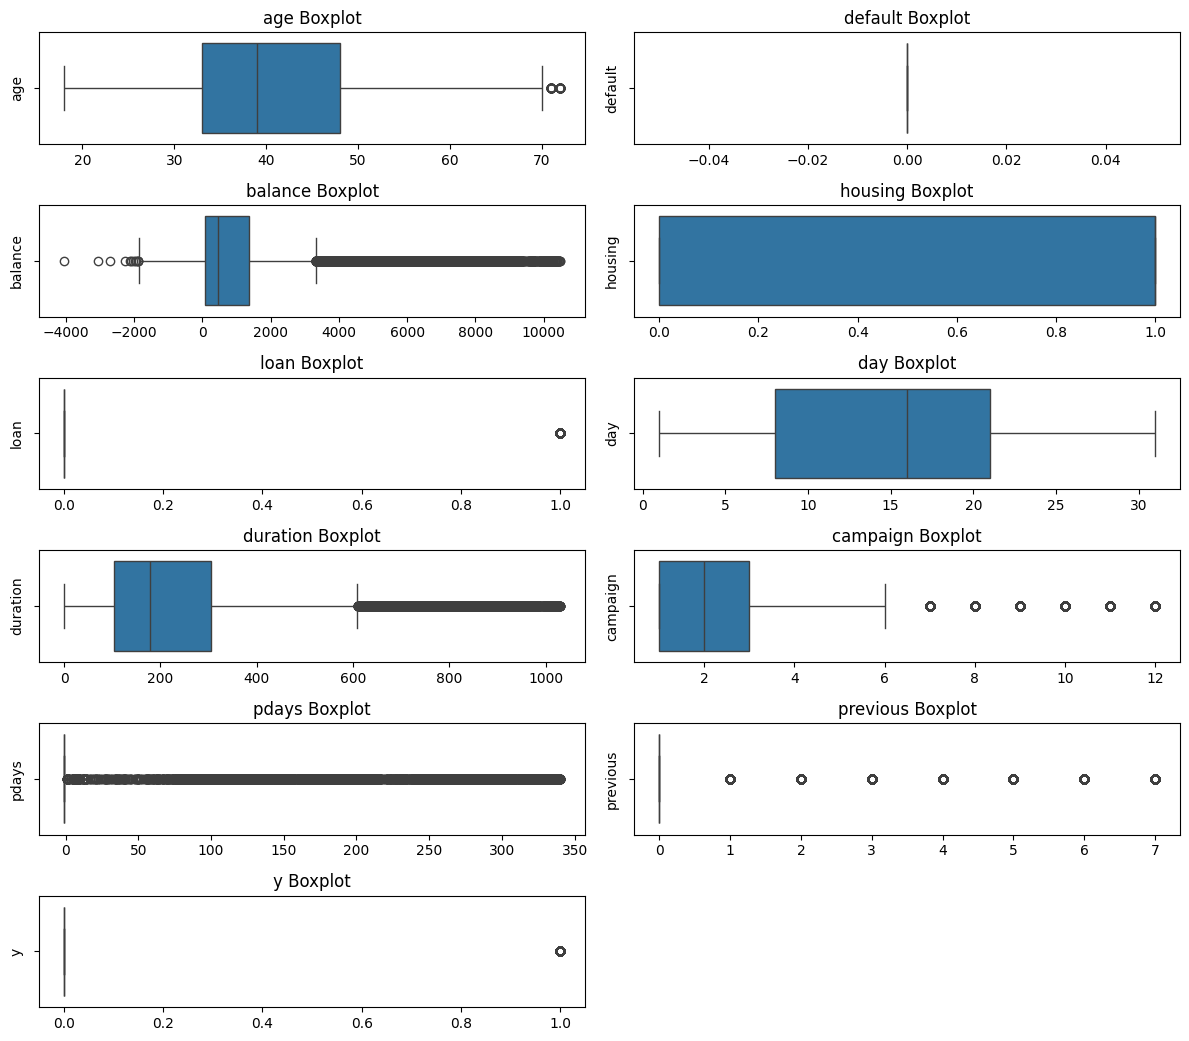

In [90]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Plot each boxplot with Seaborn
for i, col in enumerate(num_bank):
    sns.boxplot(data=df_zscore, x=df_zscore[col], ax=axes[i])
    axes[i].set_title(f"{col} Boxplot", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Remove unused subplots if num_cols < rows*cols
for j in range(len(num_bank), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

*** 

## <span style="background-color:yellow;">TASK 4: Clustering Methods</span>

***

*** 

## <span style="background-color:yellow;">TASK 5: Dimensionality Reduction</span>

***

*** 

## <span style="background-color:yellow;">TASK 6: Clustering After Dimensionality Reduction</span>

***

*** 

## <span style="background-color:yellow;">TASK 7: Comparison and Discussion</span>

***

*** 

## <span style="background-color:yellow;">TASK 8: Conclusion</span>

***


***
# <span style="background-color:yellow;">TASK 9: References</span>

***

### Banking:

* For variable descriptions: https://archive.ics.uci.edu/dataset/222/bank+marketing
* Research paper the dataset was used in: 
 S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.
* 
